In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
import string
nltk.download('stopwords')
from nltk.tokenize import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/train_df.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test_df.csv")

In [ ]:
df_train.head()

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0


In [ ]:
df_test.head()

,qid,question_text
0,a4f3da3a3df9dd881edd,My period is due on my wedding day. How can I ...
1,9914c62ed3f69684d549,How many numbers higher than a million can be ...
2,8138ae48649e37091a91,"How come I feel nothing for my family, but sti..."
3,981b4753d17ef14d09f7,"In case of collapse of the Democratic party, w..."
4,452e2c705276ba16b7b7,Who is Émile Naoumoff?


In [ ]:
df_train.isna().sum()

qid              0
question_text    0
target           0
dtype: int64

## Exploratory Data Analysis

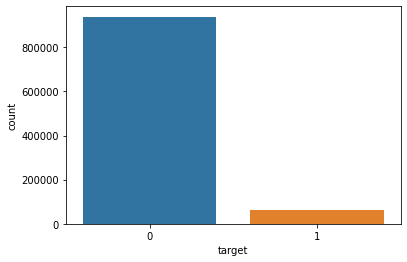

In [ ]:
count = sns.countplot(data = df_train, x ='target', order = df_train['target'].value_counts().index)
plt.show()

The above data is clearly biased and thus we might not get good accuracy when we fit a model here, so we will now randomly try to take same amount of troll and not troll questions.

In [ ]:
df_train['target'].value_counts()

0    938130
1     61870
Name: target, dtype: int64

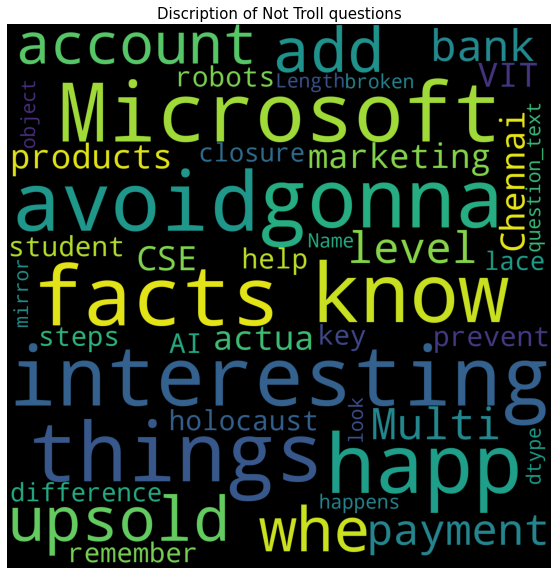

In [ ]:
positive = df_train[df_train['target'] == 0]

plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')
wc = WordCloud(background_color = 'black', width = 1500,height=1500).generate(str(positive['question_text']))

plt.title('Discription of Not Troll questions',fontsize=15)
plt.imshow(wc)
plt.axis('off')
plt.show()

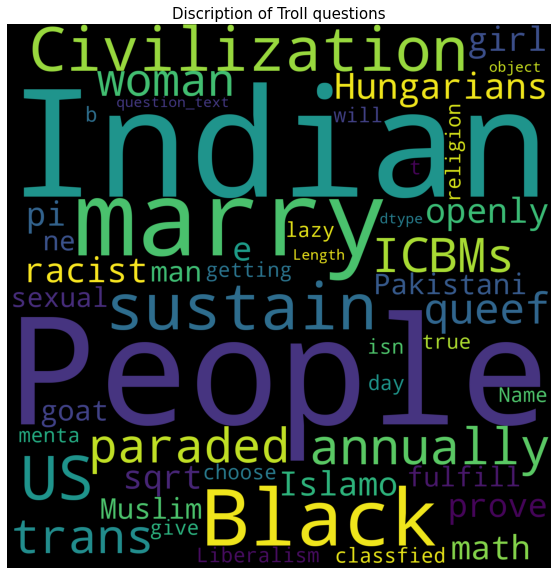

In [ ]:
negative = df_train[df_train['target'] == 1]

plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('fast')
wc = WordCloud(background_color = 'black', width = 1500,height=1500).generate(str(negative['question_text']))

plt.title('Discription of Troll questions',fontsize=15)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Preprocessing

In [ ]:
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

In [ ]:
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [ ]:
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

In [ ]:
def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [ ]:
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

In [ ]:
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text

In [ ]:
def to_lowercase(text):
    return text.lower()

In [ ]:
def data_preprocessing(x_train):
  for i in range(len(x_train)):
    # x_train[i] = remove_stopwords(x_train[i])
    x_train[i] = to_lowercase(x_train[i])
    x_train[i] = remove_extra_whitespace_tabs(x_train[i])
    x_train[i] = get_stem(x_train[i])
    x_train[i] = remove_numbers(x_train[i])
    x_train[i] = remove_punctuation(x_train[i])
    x_train[i] = remove_special_characters(x_train[i])

## Fitting the Model


In [ ]:
x = df_train['question_text']
y = df_train['target']
x = x.to_numpy()
# data_preprocessing(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
x

array(['What are interesting facts about Microsoft history?',
       'What are those things which are not gonna happen ever?',
       'What should I know to avoid being "upsold" when getting my car brakes changed?',
       ...,
       'How can I help a student remember key steps and information while writing exams?',
       'What is the difference between lace closure & lace frontals?',
       'What happens when you look into a broken mirror?'], dtype=object)

In [ ]:
x_train

array(['Can I get into DU economics hons with 85%?',
       'Will Catalonia become the next Kosovo?',
       'What if term limits were never established in the US?', ...,
       'What job do yo get with a degree in management or finance and will it get you in th sane career path as a stock broker? Could you get rich?',
       "What was GV's professional life like? What is his advice to a fresher?",
       'What shape is love?'], dtype=object)

In [ ]:
# Vectorize text questions to numbers
vec = CountVectorizer(stop_words='english')
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
model.score(x_test,y_test)

0.9385

Clearly this is not a good accuracy, since the data is baised with 93.8% of the data being labelled as not troll, thus the actual correct predictions are quite less.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test))

0.5506882141500336

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,model.predict(x_test)).ravel()

In [ ]:
print('True Positive = ', tp/(tp+fn)*100,' %')
print('True Negatives = ', tn/(tn+fp)*100,' %')

True Positive =  60.916790586409775  %
True Negatives =  96.02188178209462  %


## Trying to balance the dataset

In [ ]:
df_troll = df_train[df_train['target'] == 1]
df_not_troll = df_train[df_train['target'] == 0]

In [ ]:
df2 = df_not_troll.sample(n=61870)
df_not_troll = df2
df_not_troll

,qid,question_text,target
771944,89574d05939af5d048c6,How do you write a free verse?,0
707714,7340a0f7f31b13b54702,Why do I crave kabayaki eel during pregnancy?,0
474439,1b77eb3214f409198483,Do cancer people drink and smoke?,0
877625,c05976dad437ea39fa98,Why don't some people feel sorry for the homel...,0
335134,c51710ca523ac33c8d40,How much ton of load a slab can resist?,0
...,...,...,...
914979,64613301f9faaf012aa7,What are few recommended universities for MS i...,0
192255,f1f4b99627d87294a34f,Why are tree branches cut diagonally when prun...,0
160717,362cb70263820f3ce3e0,When does course start in IMA and OTA? In whic...,0
10363,6db1fbcca8b91911ef66,How was the first day trading experience?,0


In [ ]:
frames = [df_not_troll, df_troll]
df_train = pd.concat(frames)
df_train[df_train['target']==1]

,qid,question_text,target
6,a035227a3a8285020eee,Can Black People sustain Civilization?,1
10,17575acc5481a76f5a14,Why does the US annually paraded ICBMs through...,1
11,efad947dea80a2f0409c,Can a trans woman queef?,1
16,37377bd65419269c1032,Why are Hungarians so openly racist and Islamo...,1
25,e3ded32c8f07eea7616c,"How can we prove that ( [math]\pi, e, \sqrt[3]...",1
...,...,...,...
999905,b30a21a6b04c4d29bb9f,Should an Indian girl marry a Pakistani man?,1
999932,03e188bfdf4cf0852298,Can a Muslim marry a goat to fulfill sexual ne...,1
999940,704943719fe0160e8a3d,Why are Indian peoples getting more lazy day b...,1
999982,500e717f2c2925f96d3e,Why isn’t Liberalism classfied as a true menta...,1


In [ ]:
df_train

,qid,question_text,target
771944,89574d05939af5d048c6,How do you write a free verse?,0
707714,7340a0f7f31b13b54702,Why do I crave kabayaki eel during pregnancy?,0
474439,1b77eb3214f409198483,Do cancer people drink and smoke?,0
877625,c05976dad437ea39fa98,Why don't some people feel sorry for the homel...,0
335134,c51710ca523ac33c8d40,How much ton of load a slab can resist?,0
...,...,...,...
999905,b30a21a6b04c4d29bb9f,Should an Indian girl marry a Pakistani man?,1
999932,03e188bfdf4cf0852298,Can a Muslim marry a goat to fulfill sexual ne...,1
999940,704943719fe0160e8a3d,Why are Indian peoples getting more lazy day b...,1
999982,500e717f2c2925f96d3e,Why isn’t Liberalism classfied as a true menta...,1


## Using Multinomial NB after balancing the datasets


In [ ]:
x = df_train['question_text']
y = df_train['target']

In [ ]:
x = x.to_numpy()

In [ ]:
data_preprocessing(x)

In [ ]:
x

array(['how do you write a free verse',
       'whi do i crave kabayaki eel dure pregnancy',
       'do cancer peopl drink and smoke', ...,
       'whi are indian peopl get more lazi day by day',
       'whi isnt liber classfi as a true mental disorder',
       'which religion will you choos if you are given a choice'],
      dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [ ]:
# Vectorize text questions to numbers
vec = CountVectorizer(stop_words='english')
x_train = vec.fit_transform(x_train)
x_test = vec.transform(x_test)

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
model.score(x_test,y_test)

0.8423791821561338

Here we can clearly see that the F1 score we got after we balanced the dataset is now much better that the one we got previously (0.55).

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(x_test))

0.8523319200484555

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,model.predict(x_test)).ravel()

The number of true negatives have also increased significantly, thus signifying that our model now is much accurate.

In [ ]:
print('True Positive = ', tp/(tp+fn)*100,' %')
print('True Negatives = ', tn/(tn+fp)*100,' %')

True Positive =  91.77590817191678  %
True Negatives =  76.82989360338418  %


references: https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0, https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-naive-bayes

## making the submission csv


In [ ]:
x = df_train['question_text']
y = df_train['target']
x_test = df_test['question_text']

In [ ]:
x = x.to_numpy()
x_test = x_test.to_numpy()

In [ ]:
data_preprocessing(x)
data_preprocessing(x_test)

In [ ]:
vec = CountVectorizer(stop_words='english')
x =  vec.fit_transform(x)
x_test =  vec.transform(x_test)

In [ ]:
model = MultinomialNB()
model.fit(x,y)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_submission = df_test

In [ ]:
df_submission['target'] = pd.DataFrame(y_pred,columns=['target'])

In [ ]:
df_submission

,qid,question_text,target
0,a4f3da3a3df9dd881edd,my period is due on my wed day how can i stop ...,0
1,9914c62ed3f69684d549,how mani number higher than a million can be f...,0
2,8138ae48649e37091a91,how come i feel noth for my famili but still l...,1
3,981b4753d17ef14d09f7,in case of collap of the democrat parti will t...,1
4,452e2c705276ba16b7b7,who is mile naoumoff,0
...,...,...,...
306117,a352dff4fcc2571815ce,did anyon get an updat on maruti suzuki all in...,0
306118,ad4a8498d97c536c67b9,what peopl in histori do you find the most in...,1
306119,19784a27b55d4b453fda,how can i remov the tan on my forehead,0
306120,370191dba26465997879,if you are a well known hacker will you be mor...,0


In [ ]:
df_submission = df_submission.drop(['question_text'],axis=1)

In [ ]:
df_submission

,qid,target
0,a4f3da3a3df9dd881edd,0
1,9914c62ed3f69684d549,0
2,8138ae48649e37091a91,1
3,981b4753d17ef14d09f7,1
4,452e2c705276ba16b7b7,0
...,...,...
306117,a352dff4fcc2571815ce,0
306118,ad4a8498d97c536c67b9,1
306119,19784a27b55d4b453fda,0
306120,370191dba26465997879,0


In [ ]:
df_submission.to_csv('submission_final.csv',index=False)